In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1 = pd.read_csv("house_rental_data.csv.txt")
df1.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
df1.shape

(645, 8)

In [6]:
df1.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df1.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [9]:
df1.Price.describe()

count       645.000000
mean      61986.823256
std       35635.091007
min        6100.000000
25%       39000.000000
50%       50000.000000
75%       75000.000000
max      250000.000000
Name: Price, dtype: float64

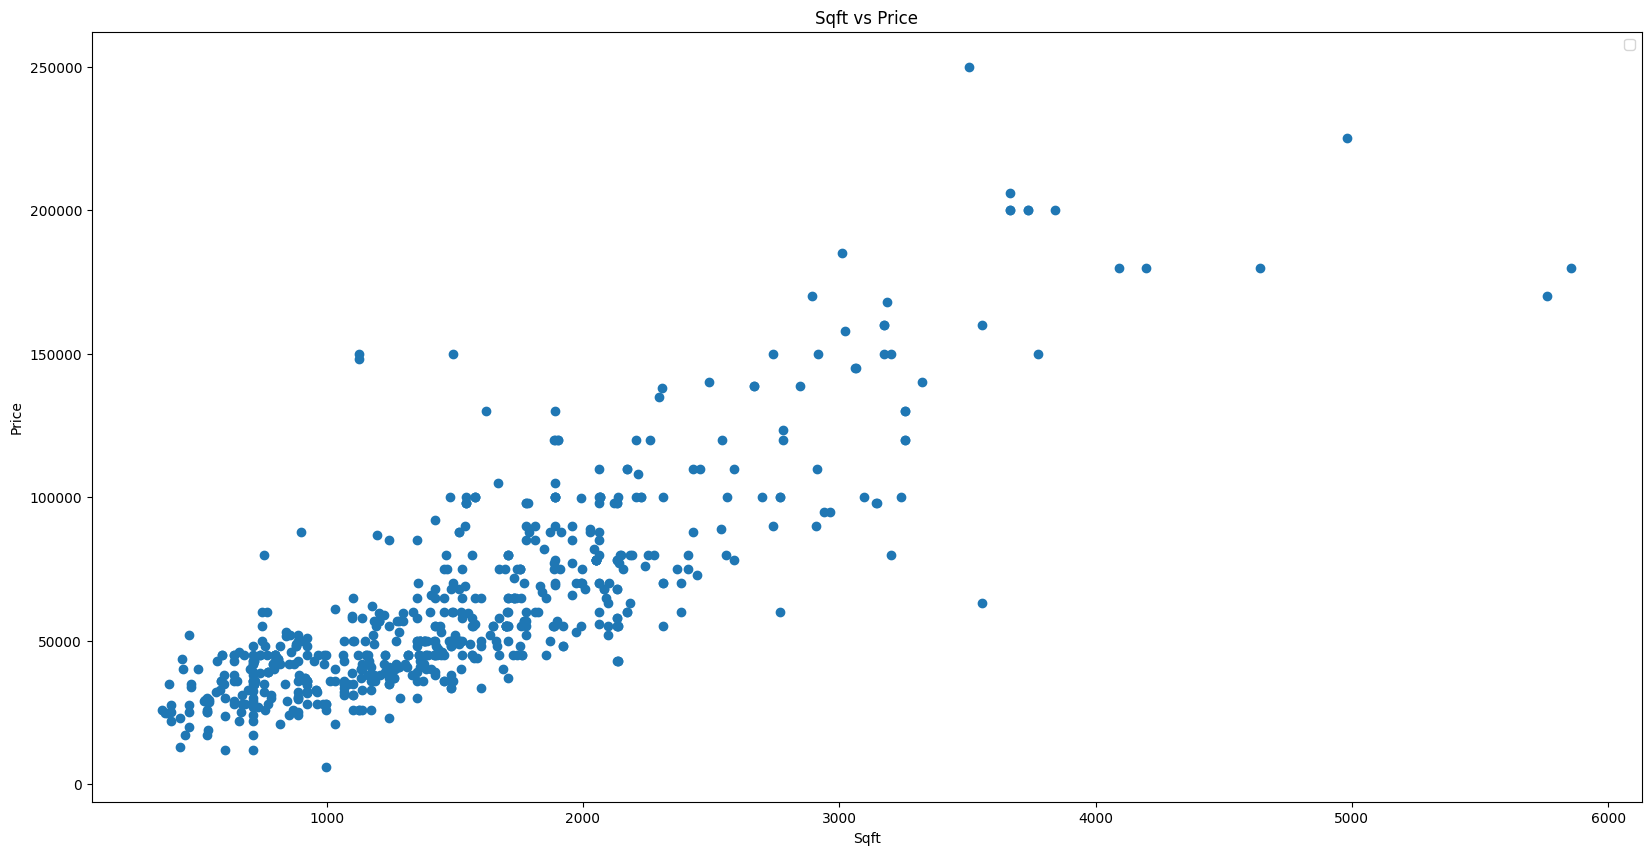

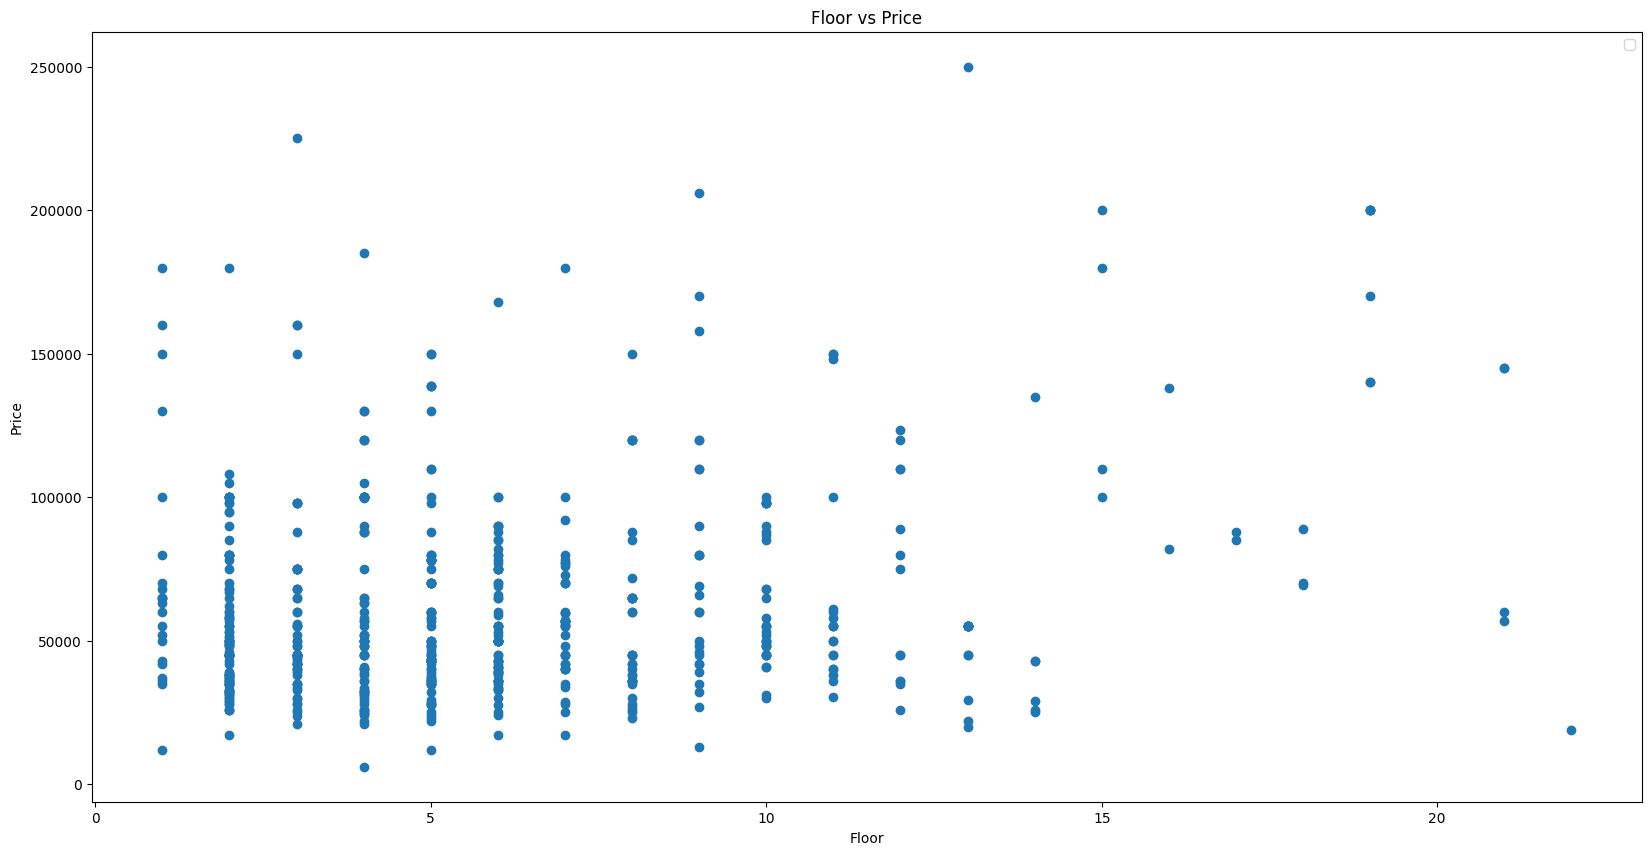

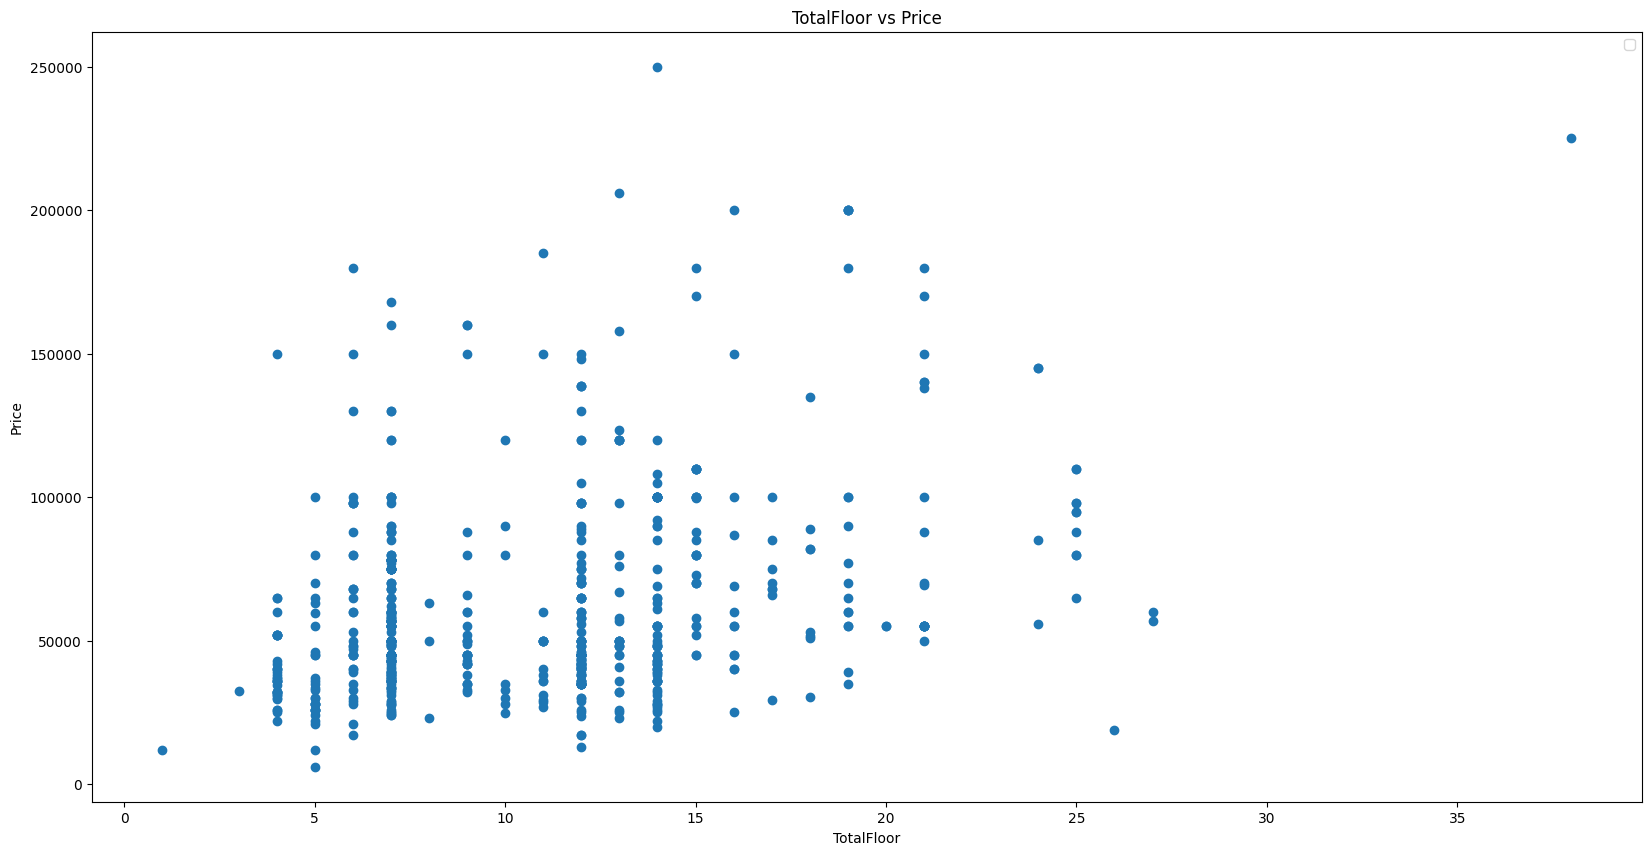

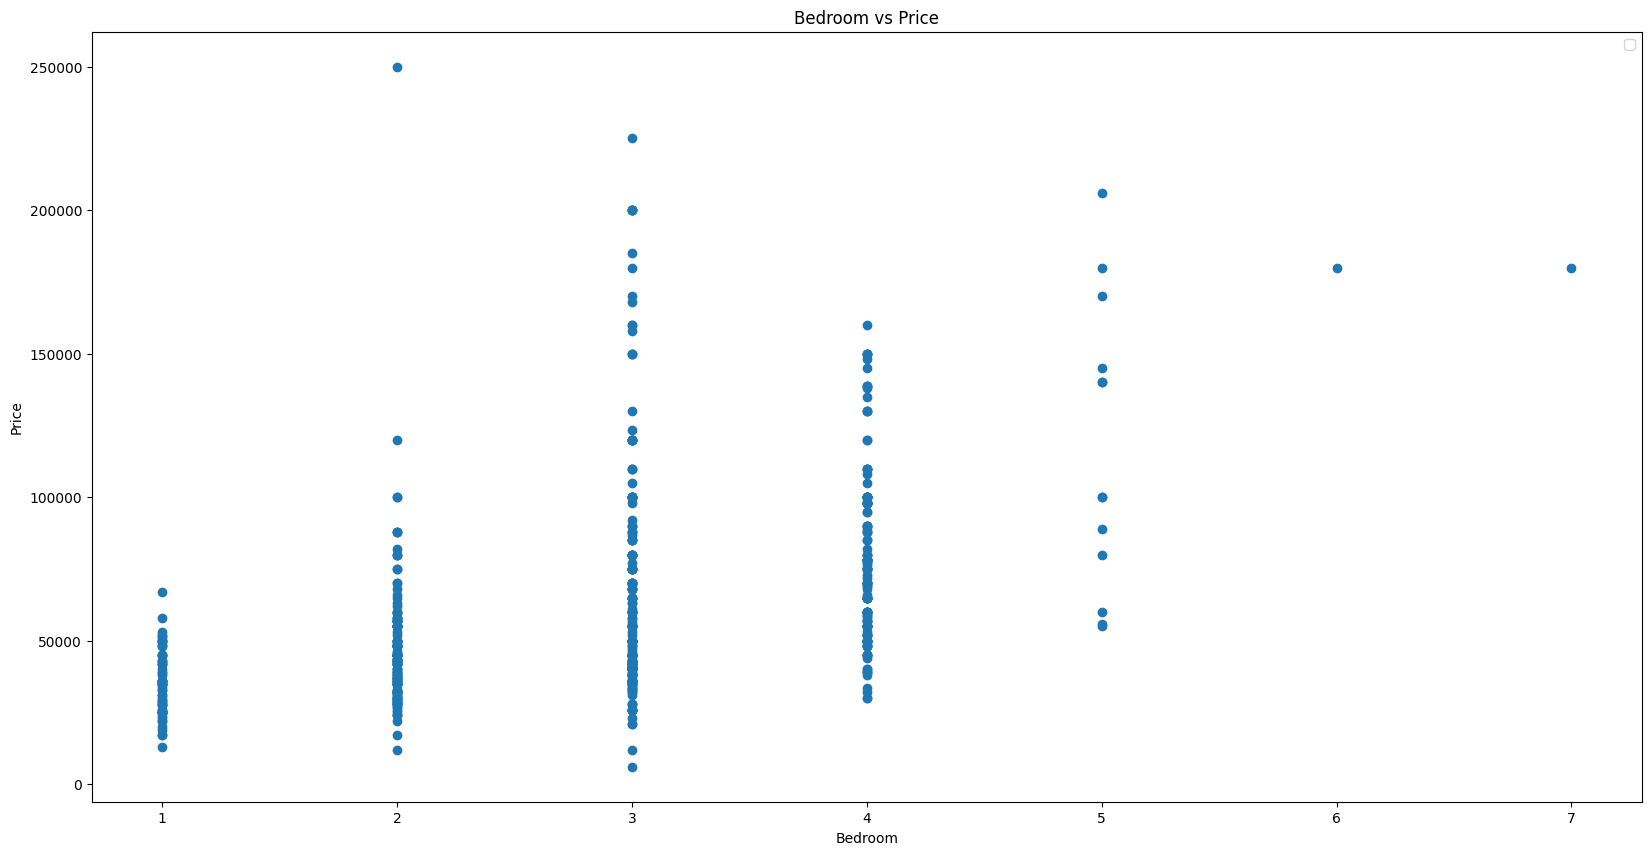

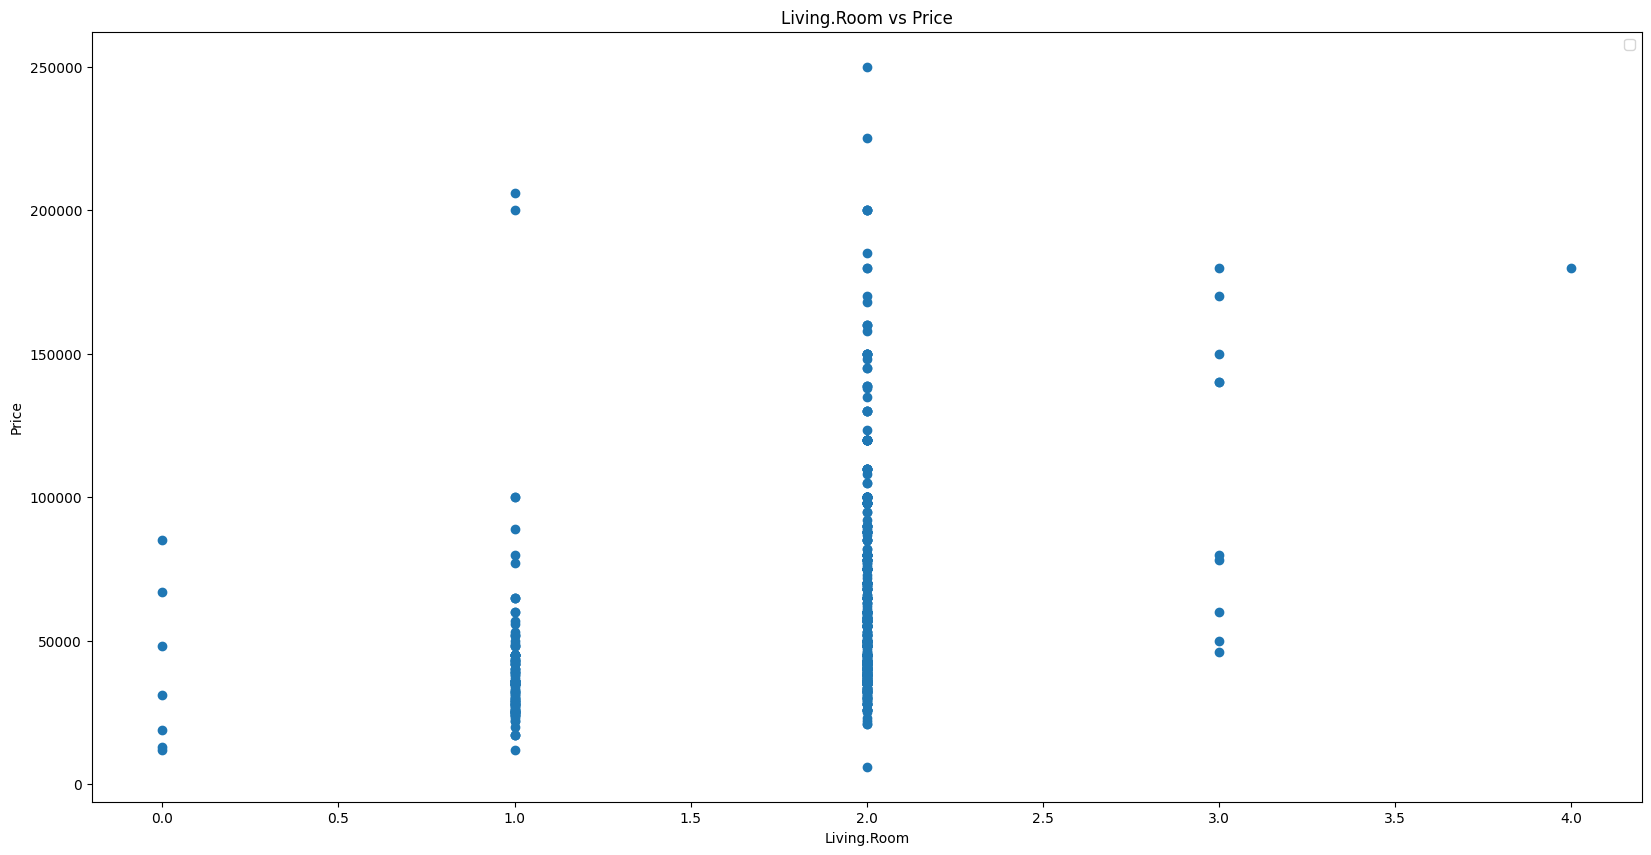

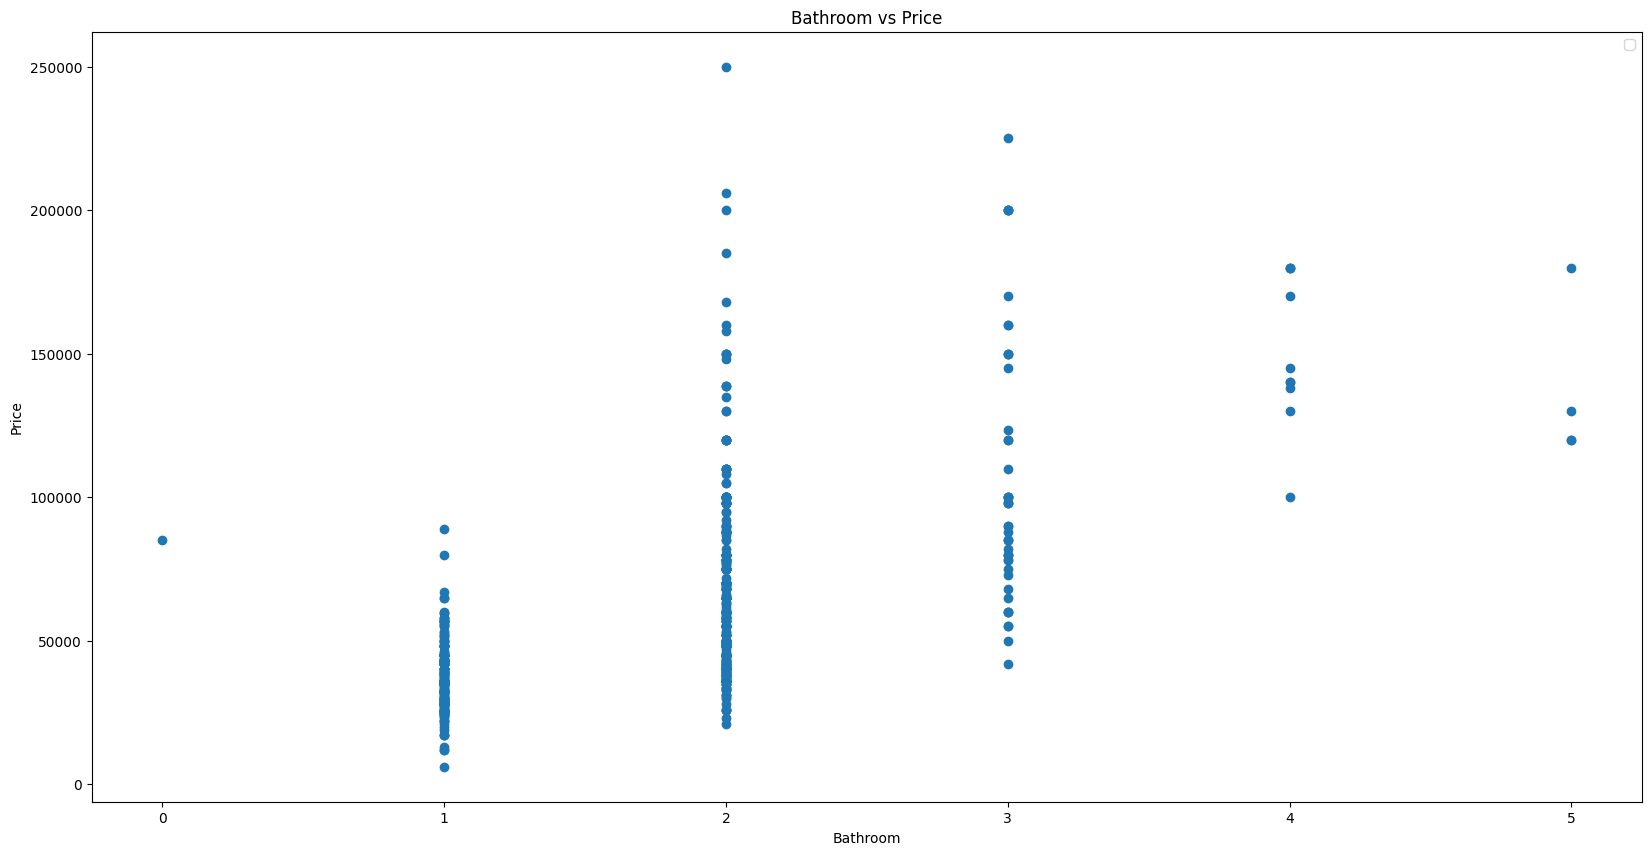

In [20]:
for x_col in df1.columns[:-1]:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df1[x_col], df1["Price"])
    ax.set_xlabel(x_col)
    ax.set_ylabel("Price")
    ax.set_title("{} vs {}".format(x_col, "Price"))

    plt.legend()
    plt.show()

In [23]:
X = df1.drop(['Price'],axis='columns')
y = df1["Price"]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [25]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7408340880258009

In [26]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.7101965 , 0.69284515, 0.67440808, 0.72739021, 0.48131952])

In [36]:
pred = lr_clf.predict(X_test)
pred[0:5]

array([ 37062.64242911,  76993.3926487 , 139553.10140346, 135568.00554423,
        43162.1860839 ])

In [37]:
y_test.head()

408     32000
442     78000
299    206000
27     145000
592     31000
Name: Price, dtype: int64

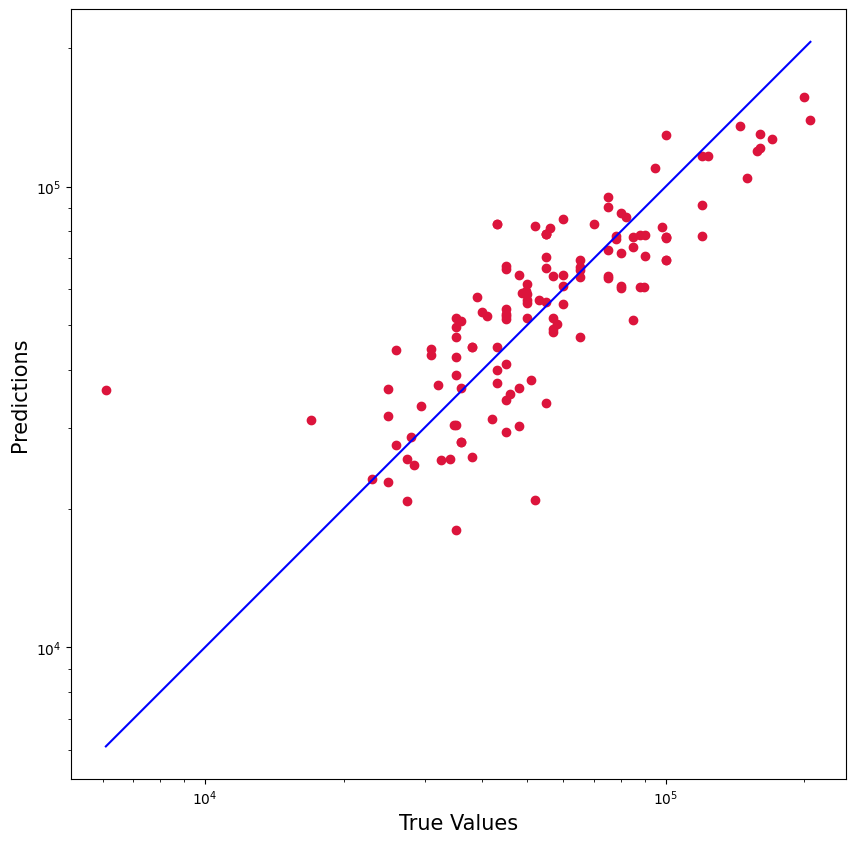

In [90]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()